In [23]:
%pip install seaborn
%pip install matplotlib
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline 


In [25]:
CLASSES = ["non demented" , "very mild demented" , "mild demented", "moderate demented"]
IMAGESIZE = 224

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up your ImageDataGenerator with normalization (rescaling)
traindata_gen = ImageDataGenerator(
    rescale=1.0/255.0  # Normalize pixel values to the range [0, 1]
)

# Load your training data
traindata = traindata_gen.flow_from_directory(
    directory="data/train",
    target_size=(224, 224),  # Resize images to the desired dimensions
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    classes=CLASSES,  # Specify the class names
)

# Set up the test/dev data generator with the same normalization
testdata_gen = ImageDataGenerator(
    rescale=1.0/255.0
)

# Load your validation data
devdata = testdata_gen.flow_from_directory(
    directory="data/dev",
    target_size=(224, 224),  # Ensure consistent image size
    class_mode='categorical',  # Class mode should match the training setup
    classes=CLASSES,
)


Found 30467 images belonging to 4 classes.
Found 6528 images belonging to 4 classes.


In [28]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Hyperparameters
EPOCHS = 40
LEARNING_RATE = 0.001
BATCH_SIZE = 32
INPUT_SHAPE = (224, 224, 3)  # Required input for MobileNetV2
NUM_CLASSES = 4  # Adjust based on your dataset

# Load Pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)
base_model.trainable = False  # Freeze pre-trained layers for transfer learning

# Build the Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Convert feature maps to 1D
    
    # Fully Connected and Dropout Layers
    Dense(512, activation='relu'),   # New Dense Layer
    Dropout(0.5),  # Dropout for regularization
    Dense(256, activation='relu'),   # Existing Dense Layer
    Dropout(0.5),  # Dropout for regularization
    
    # Output Layer
    Dense(NUM_CLASSES, activation='softmax')  
])

# Compile the Model
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the Model Summary
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,046,212 (11.62 MB)

 Trainable params: 788,228 (3.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Train the Model
history = model.fit(
    traindata,
    validation_data=devdata,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 381s 395ms/step - accuracy: 0.4930 - loss: 1.0855 - val_accuracy: 0.5931 - val_loss: 0.8637
Epoch 2/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 373s 391ms/step - accuracy: 0.5725 - loss: 0.9067 - val_accuracy: 0.6158 - val_loss: 0.8268
Epoch 3/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 372s 390ms/step - accuracy: 0.5989 - loss: 0.8693 - val_accuracy: 0.6164 - val_loss: 0.8187
Epoch 4/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 372s 390ms/step - accuracy: 0.6075 - loss: 0.8417 - val_accuracy: 0.6310 - val_loss: 0.7819
Epoch 5/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 373s 392ms/step - accuracy: 0.6096 - loss: 0.8311 - val_accuracy: 0.6426 - val_loss: 0.7805
Epoch 6/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 371s 390ms/step - accuracy: 0.6216 - loss: 0.8202 - val_accuracy: 0.6428 - val_loss: 0.7772
Epoch 7/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 371s 389ms/step - accuracy: 0.6201 - loss: 0.8144 - val_accuracy: 0.6527 - val_loss: 0.7687
Epoch 8/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 372s 390ms/step - accuracy: 0.6281 -

In [21]:
print(history.history.keys())


NameError: name 'history' is not defined

NameError: name 'history' is not defined

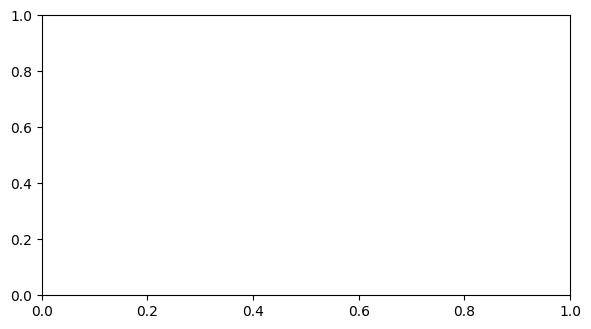

In [3]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the ImageDataGenerator for testing (with normalization only)
testingData = ImageDataGenerator(
    rescale=1.0/255.0  # Normalize pixel values to [0, 1]
)

# Load your test data
testdata = testingData.flow_from_directory(
    directory="data/test",
    target_size=(224, 224),  # Resize images to the desired dimensions
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    classes=CLASSES  # Specify the class names
)

NameError: name 'CLASSES' is not defined

In [23]:
modelName = "My4wayAD.keras";
model.save(modelName);

Found 329 images belonging to 4 classes.


c:\Users\NET-PC\.conda\envs\pytorch_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 298ms/step - accuracy: 0.6494 - loss: 0.7997
Accuracy: 0.6231002807617188
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 402ms/step
Confusion Matrix
[[71 10 11  0]
 [36 23 25  1]
 [11  8 58  2]
 [ 1  5 14 53]]
Precision: 0.634972546938397
Sensitivity (Recall): 0.6231003039513677
Error Rate: 0.37689971923828125
Classification Report
                    precision    recall  f1-score   support

      non demented       0.60      0.77      0.67        92
very mild demented       0.50      0.27      0.35        85
     mild demented       0.54      0.73      0.62        79
 moderate demented       0.95      0.73      0.82        73

          accuracy                           0.62       329
         macro avg       0.65      0.63      0.62       329
      weighted avg       0.63      0.62      0.61       329



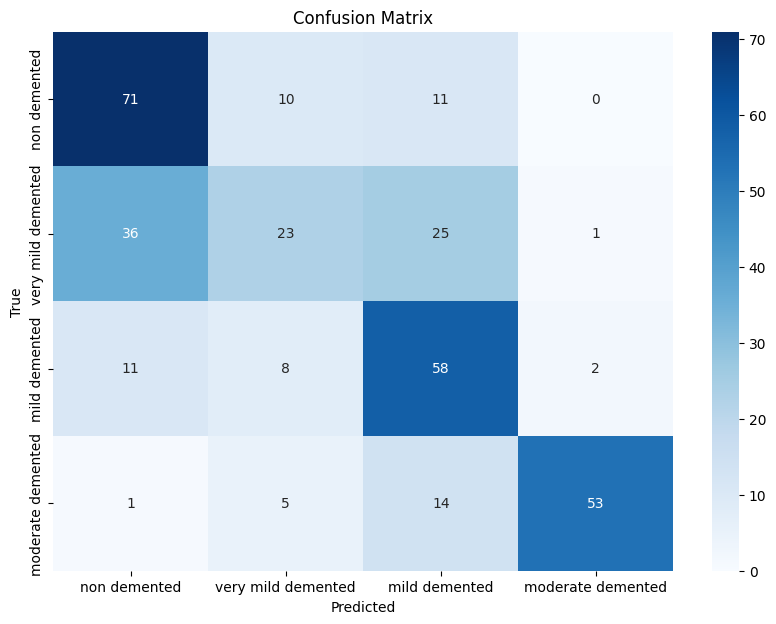

In [24]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your pre-trained model
model = tf.keras.models.load_model(modelName)

# Create the test data generator
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Specify the path to your test set
test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(IMAGESIZE, IMAGESIZE),  # Change this to the input size of your model
    class_mode='categorical',  # or 'binary' depending on your model
    shuffle=False,
    classes = CLASSES
)

# Evaluate the model using the generator
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Accuracy: {accuracy}")

# Get predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix")
print(cm)

# Calculate additional metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
error_rate = 1 - accuracy

print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {recall}")
print(f"Error Rate: {error_rate}")

# Classification Report
print("Classification Report")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
